In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import LocalOutlierFactor
from util.VisualizeDataset import VisualizeDataset
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
%matplotlib inline

OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()
DataViz = VisualizeDataset('CH3 Notebook')

<Figure size 1800x1200 with 0 Axes>

In [64]:
df = pd.read_csv('A3_dataset/COMBINED_ch2_result.csv')
for label in df.activity.unique():
    df["label-" + label] = (df['activity'] == label)

In [3]:
outlier_columns = ['acc_x', 'acc_y', 'acc_z', 'grav_x', 'grav_y', 'grav_z', 'lin_x',
       'lin_y', 'lin_z', 'gyr_x', 'gyr_y', 'gyr_z']


outlier_sets = {
    'acc_columns': ['acc_x', 'acc_y', 'acc_z'],
    'grav_columns': ['grav_x', 'grav_y', 'grav_z'],
    'gyr_columns': ['gyr_x', 'gyr_y', 'gyr_z'],
    'lin_columns': ['lin_x', 'lin_y', 'lin_z'],
}

In [4]:
# for x, y, z in outlier_sets:
#     fig = plt.figure(figsize=(8, 8), dpi = 400)
#     ax = fig.add_subplot(projection='3d')
#     ax.scatter(df[x], df[y], df[z])
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     ax.set_zlabel(z)
#     plt.show()

In [5]:
# for col in outlier_columns:
#     df = OutlierDistr.chauvenet(df, col, C=2.5)
#     plt.figure(dpi=300)
#     DataViz.plot_binary_outliers(df, col, col + "_outlier")

In [6]:
# for col in [c for c in outlier_columns if not "label" in c]:
#     print(f"Measurement is now: {col}")
#     df = OutlierDistr.chauvenet(df, col, 2.5)
#     df.loc[df[f"{col}_outlier"] == True, col] = np.nan
#     del df[col + "_outlier"]


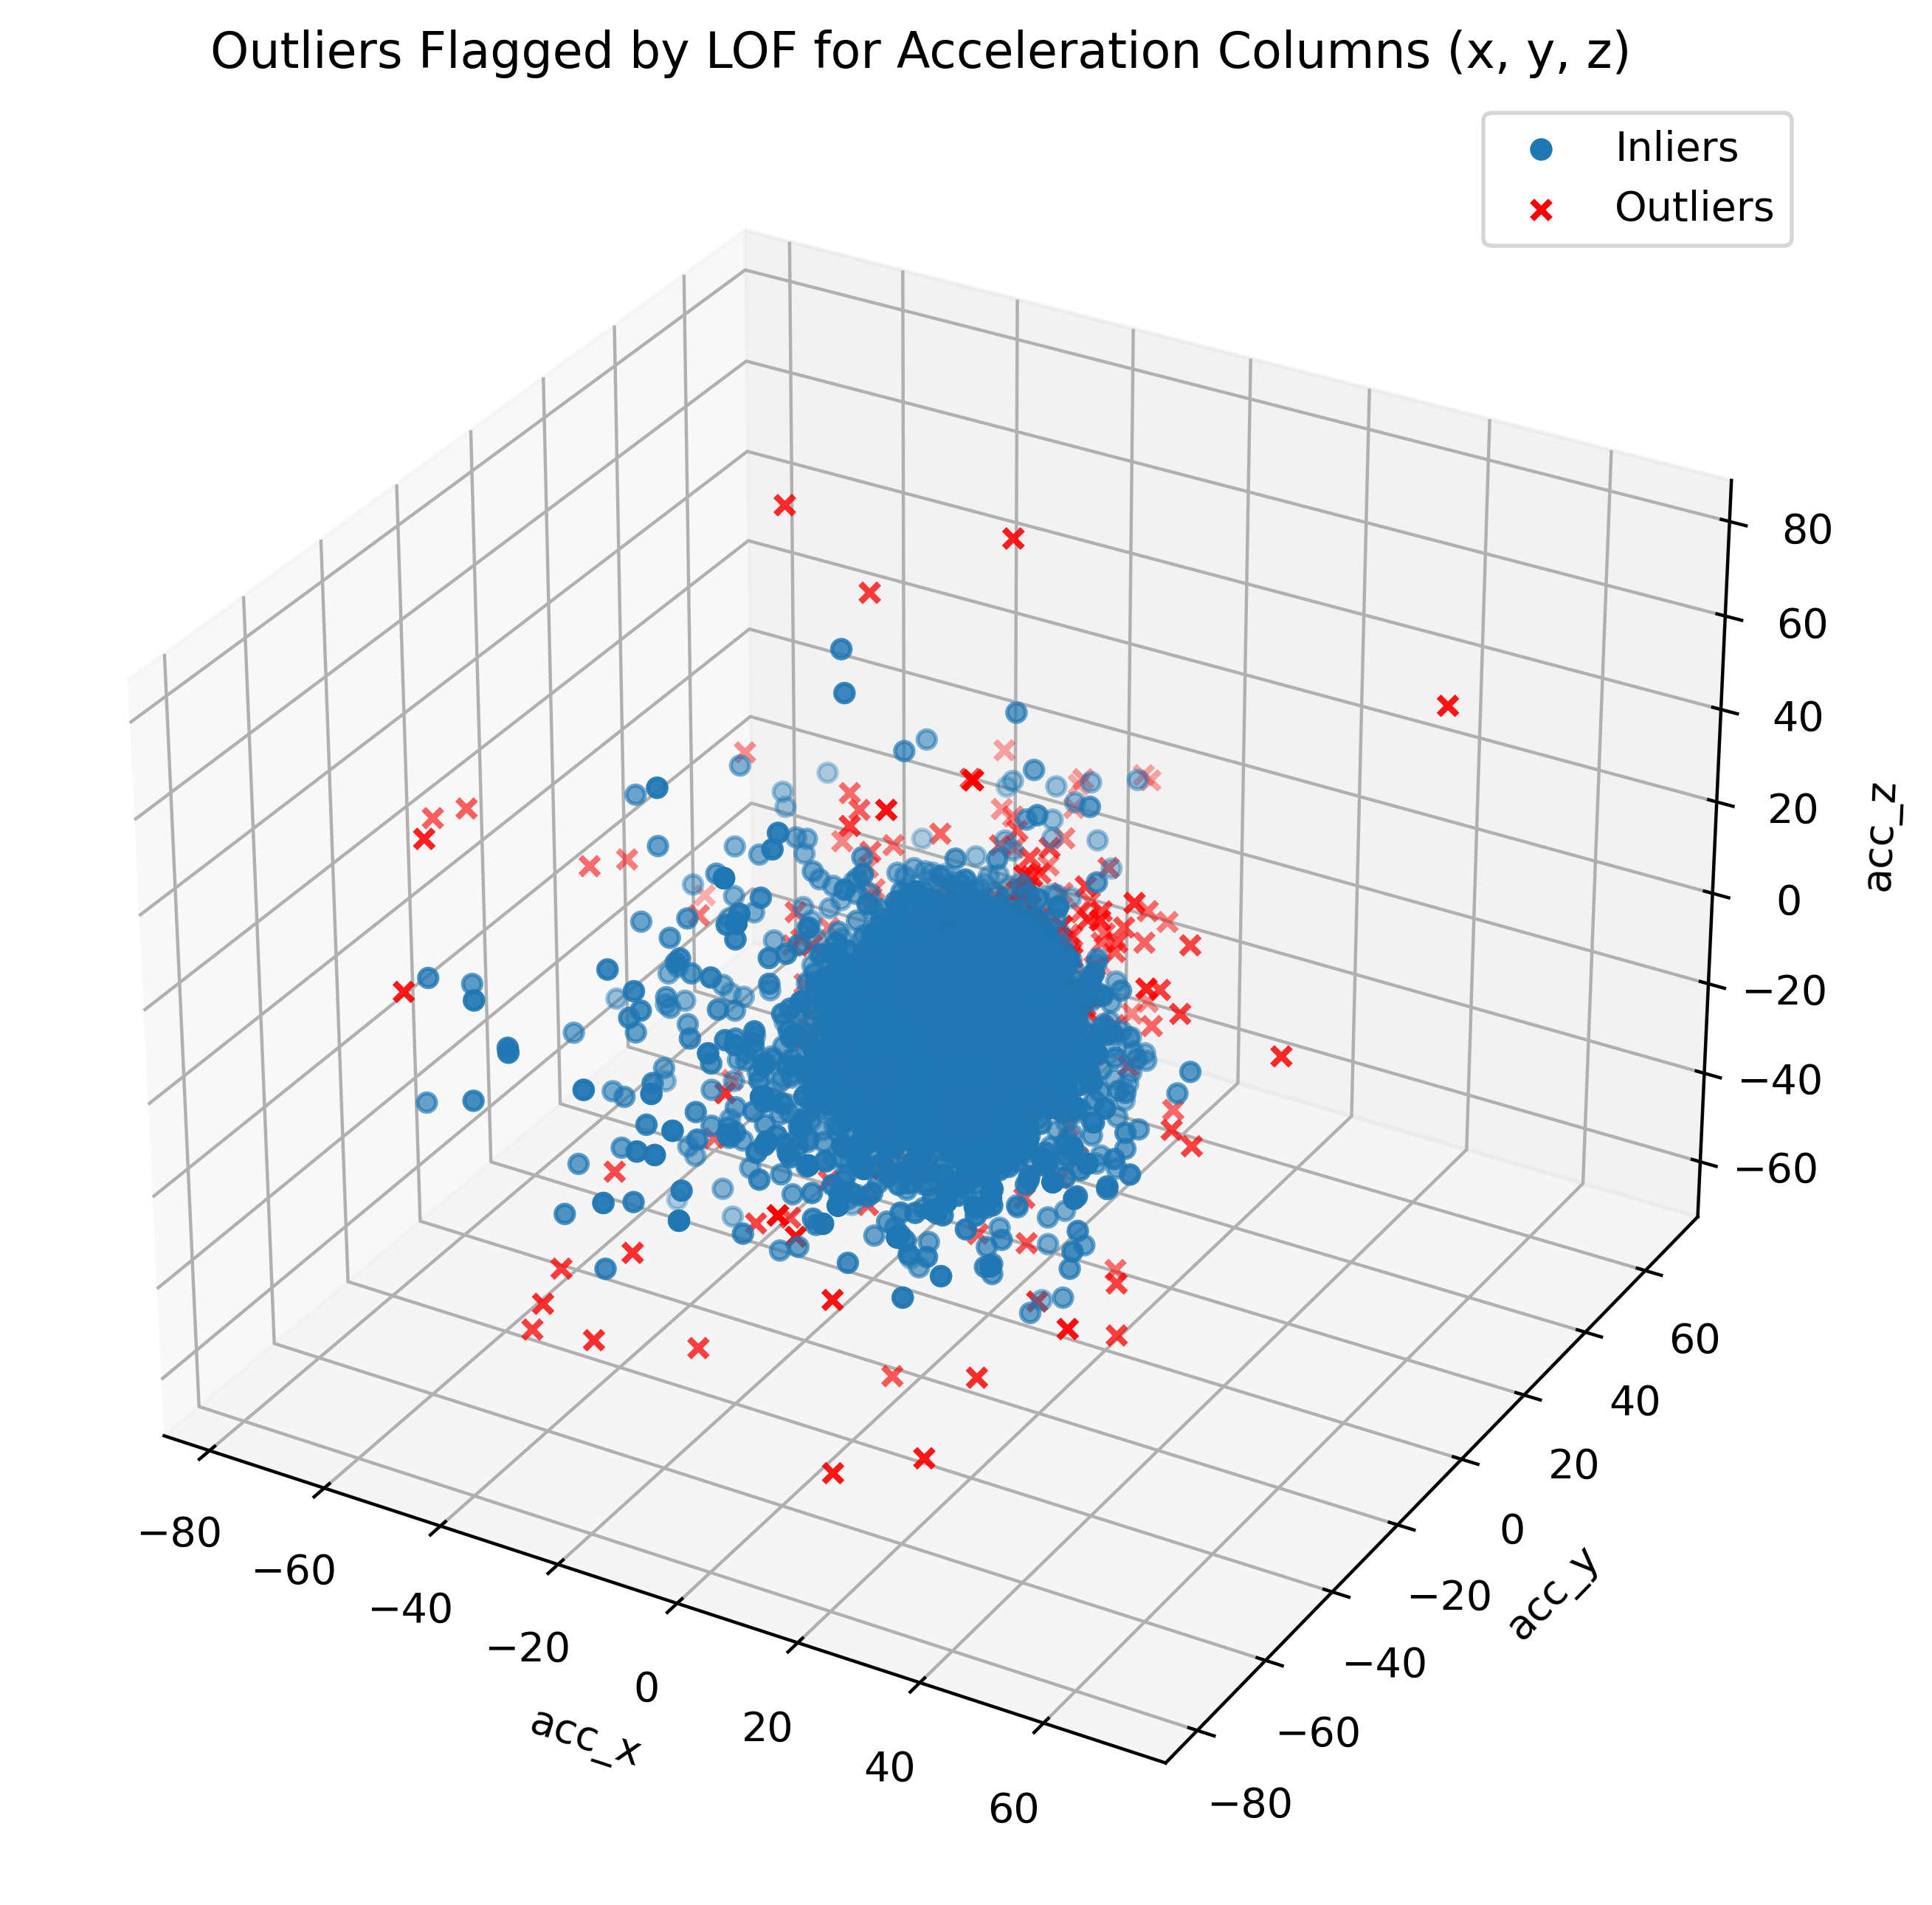

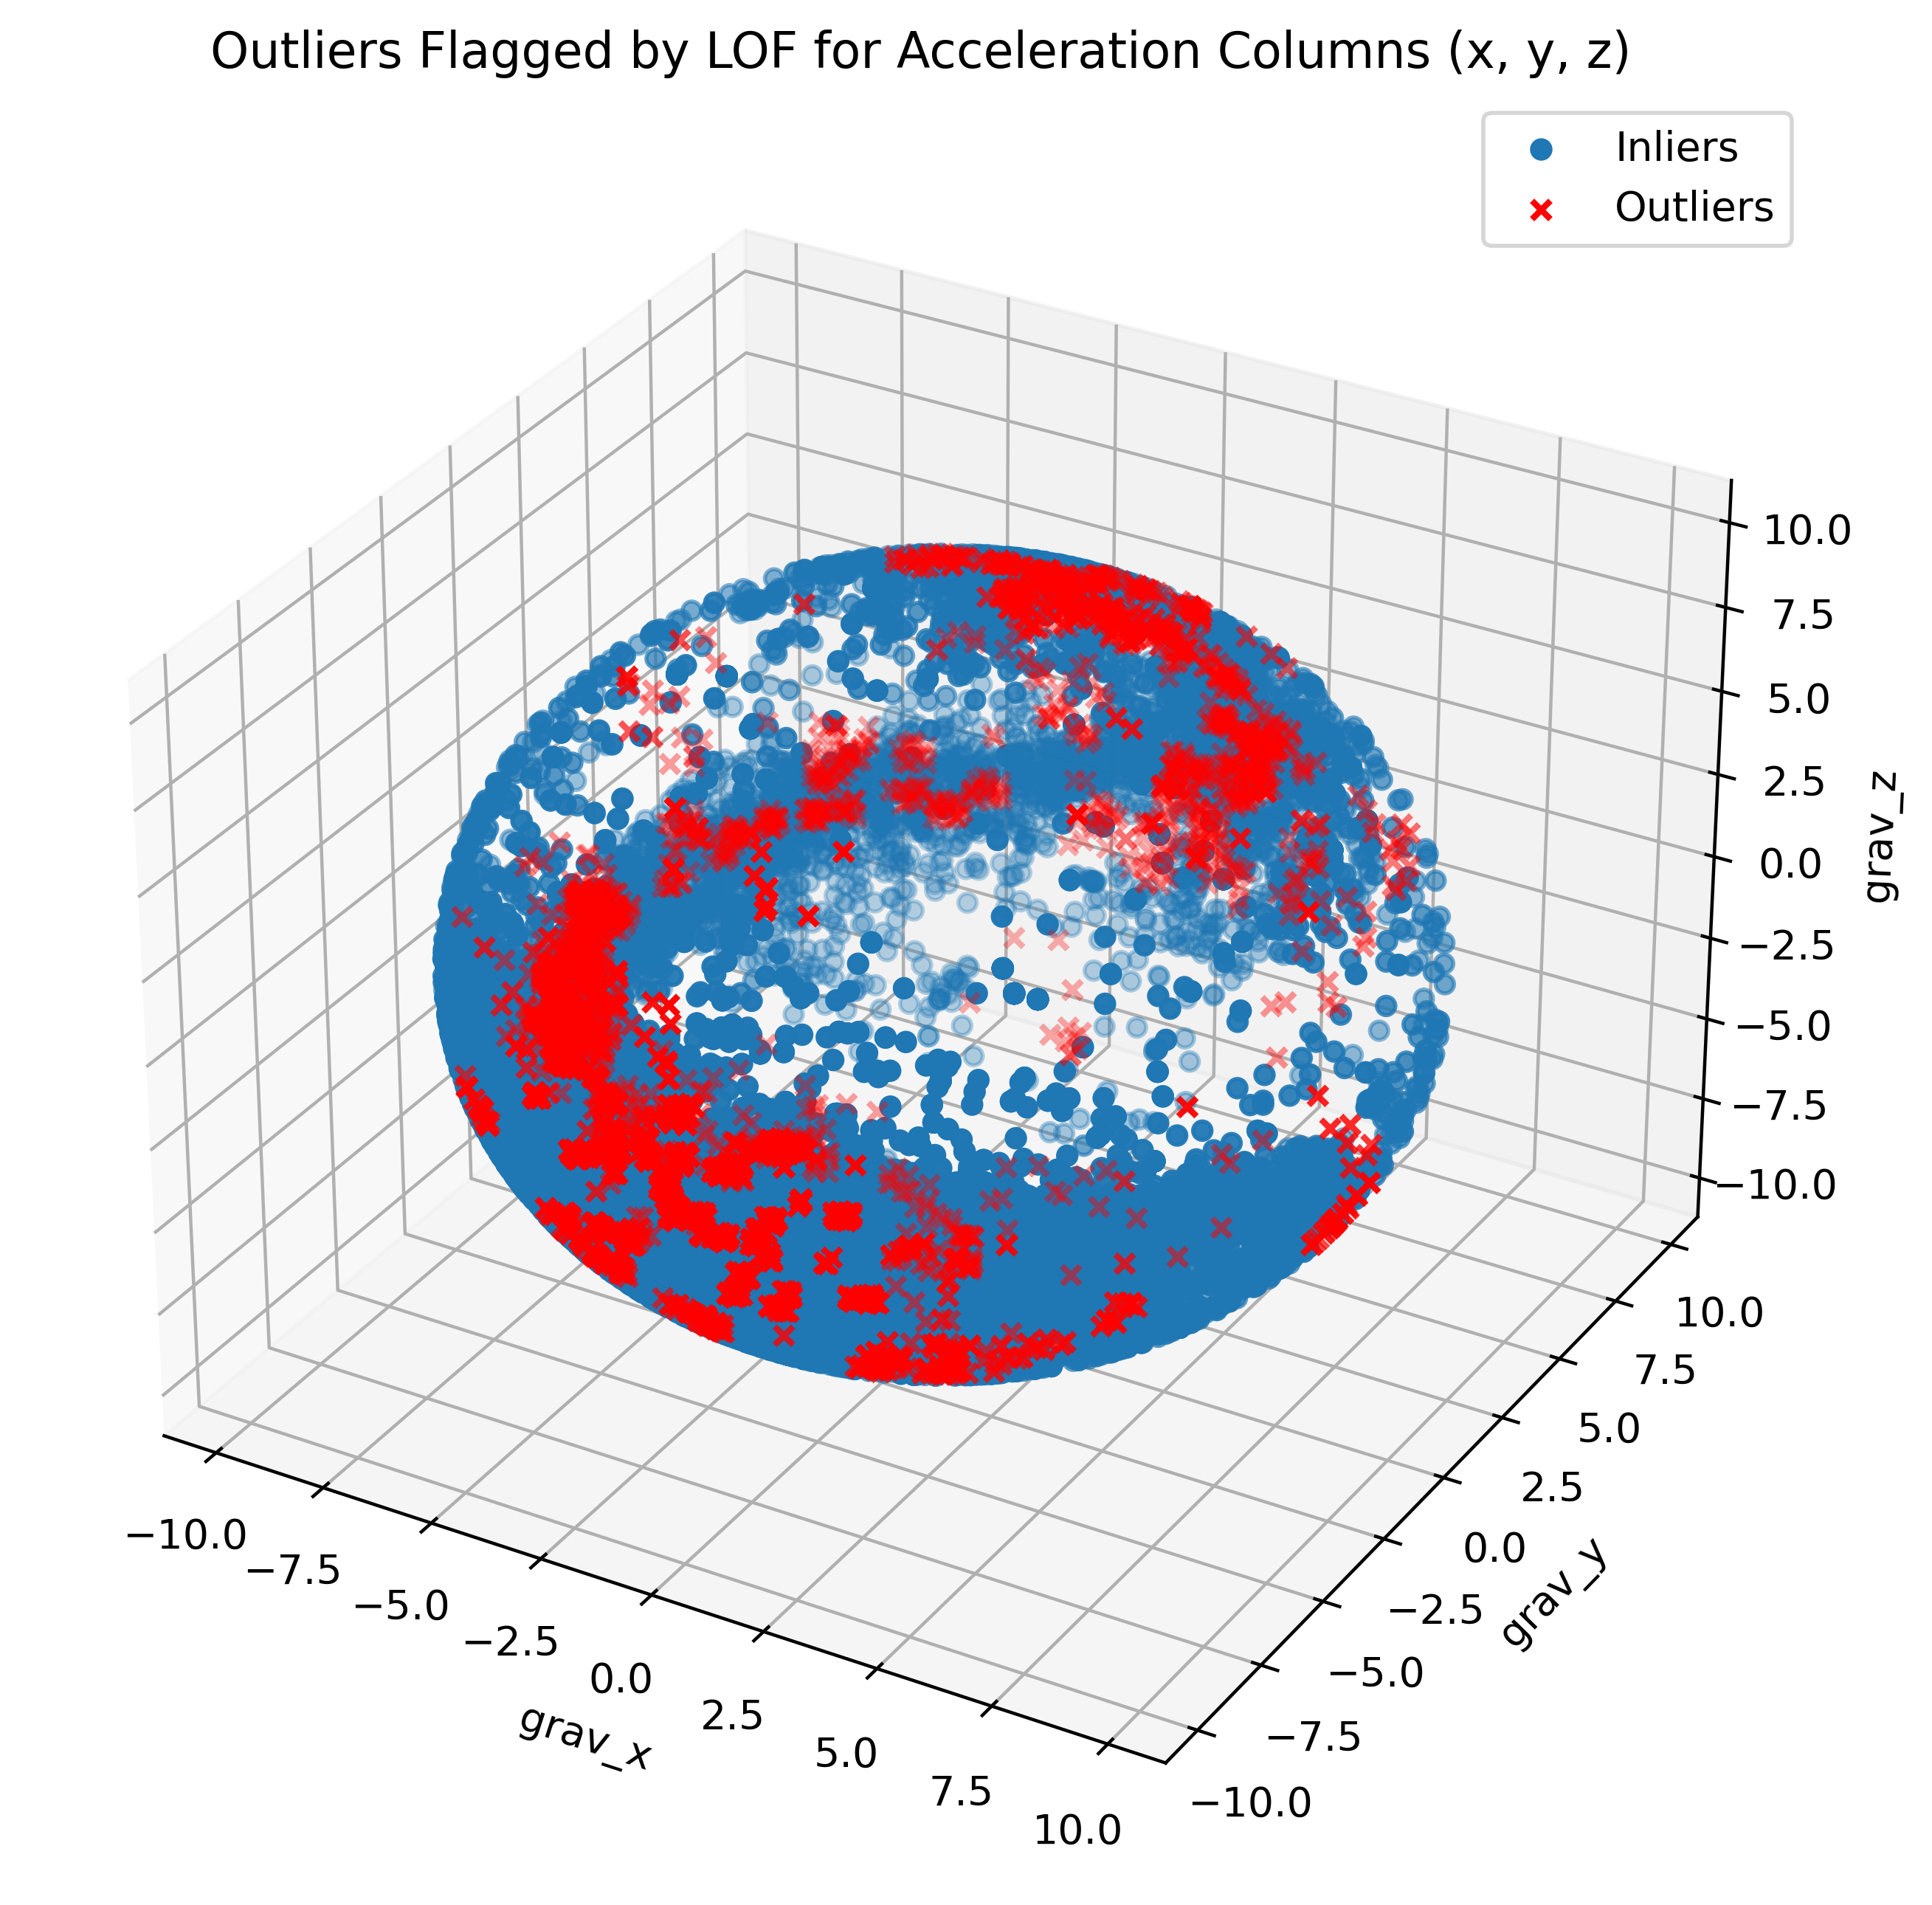

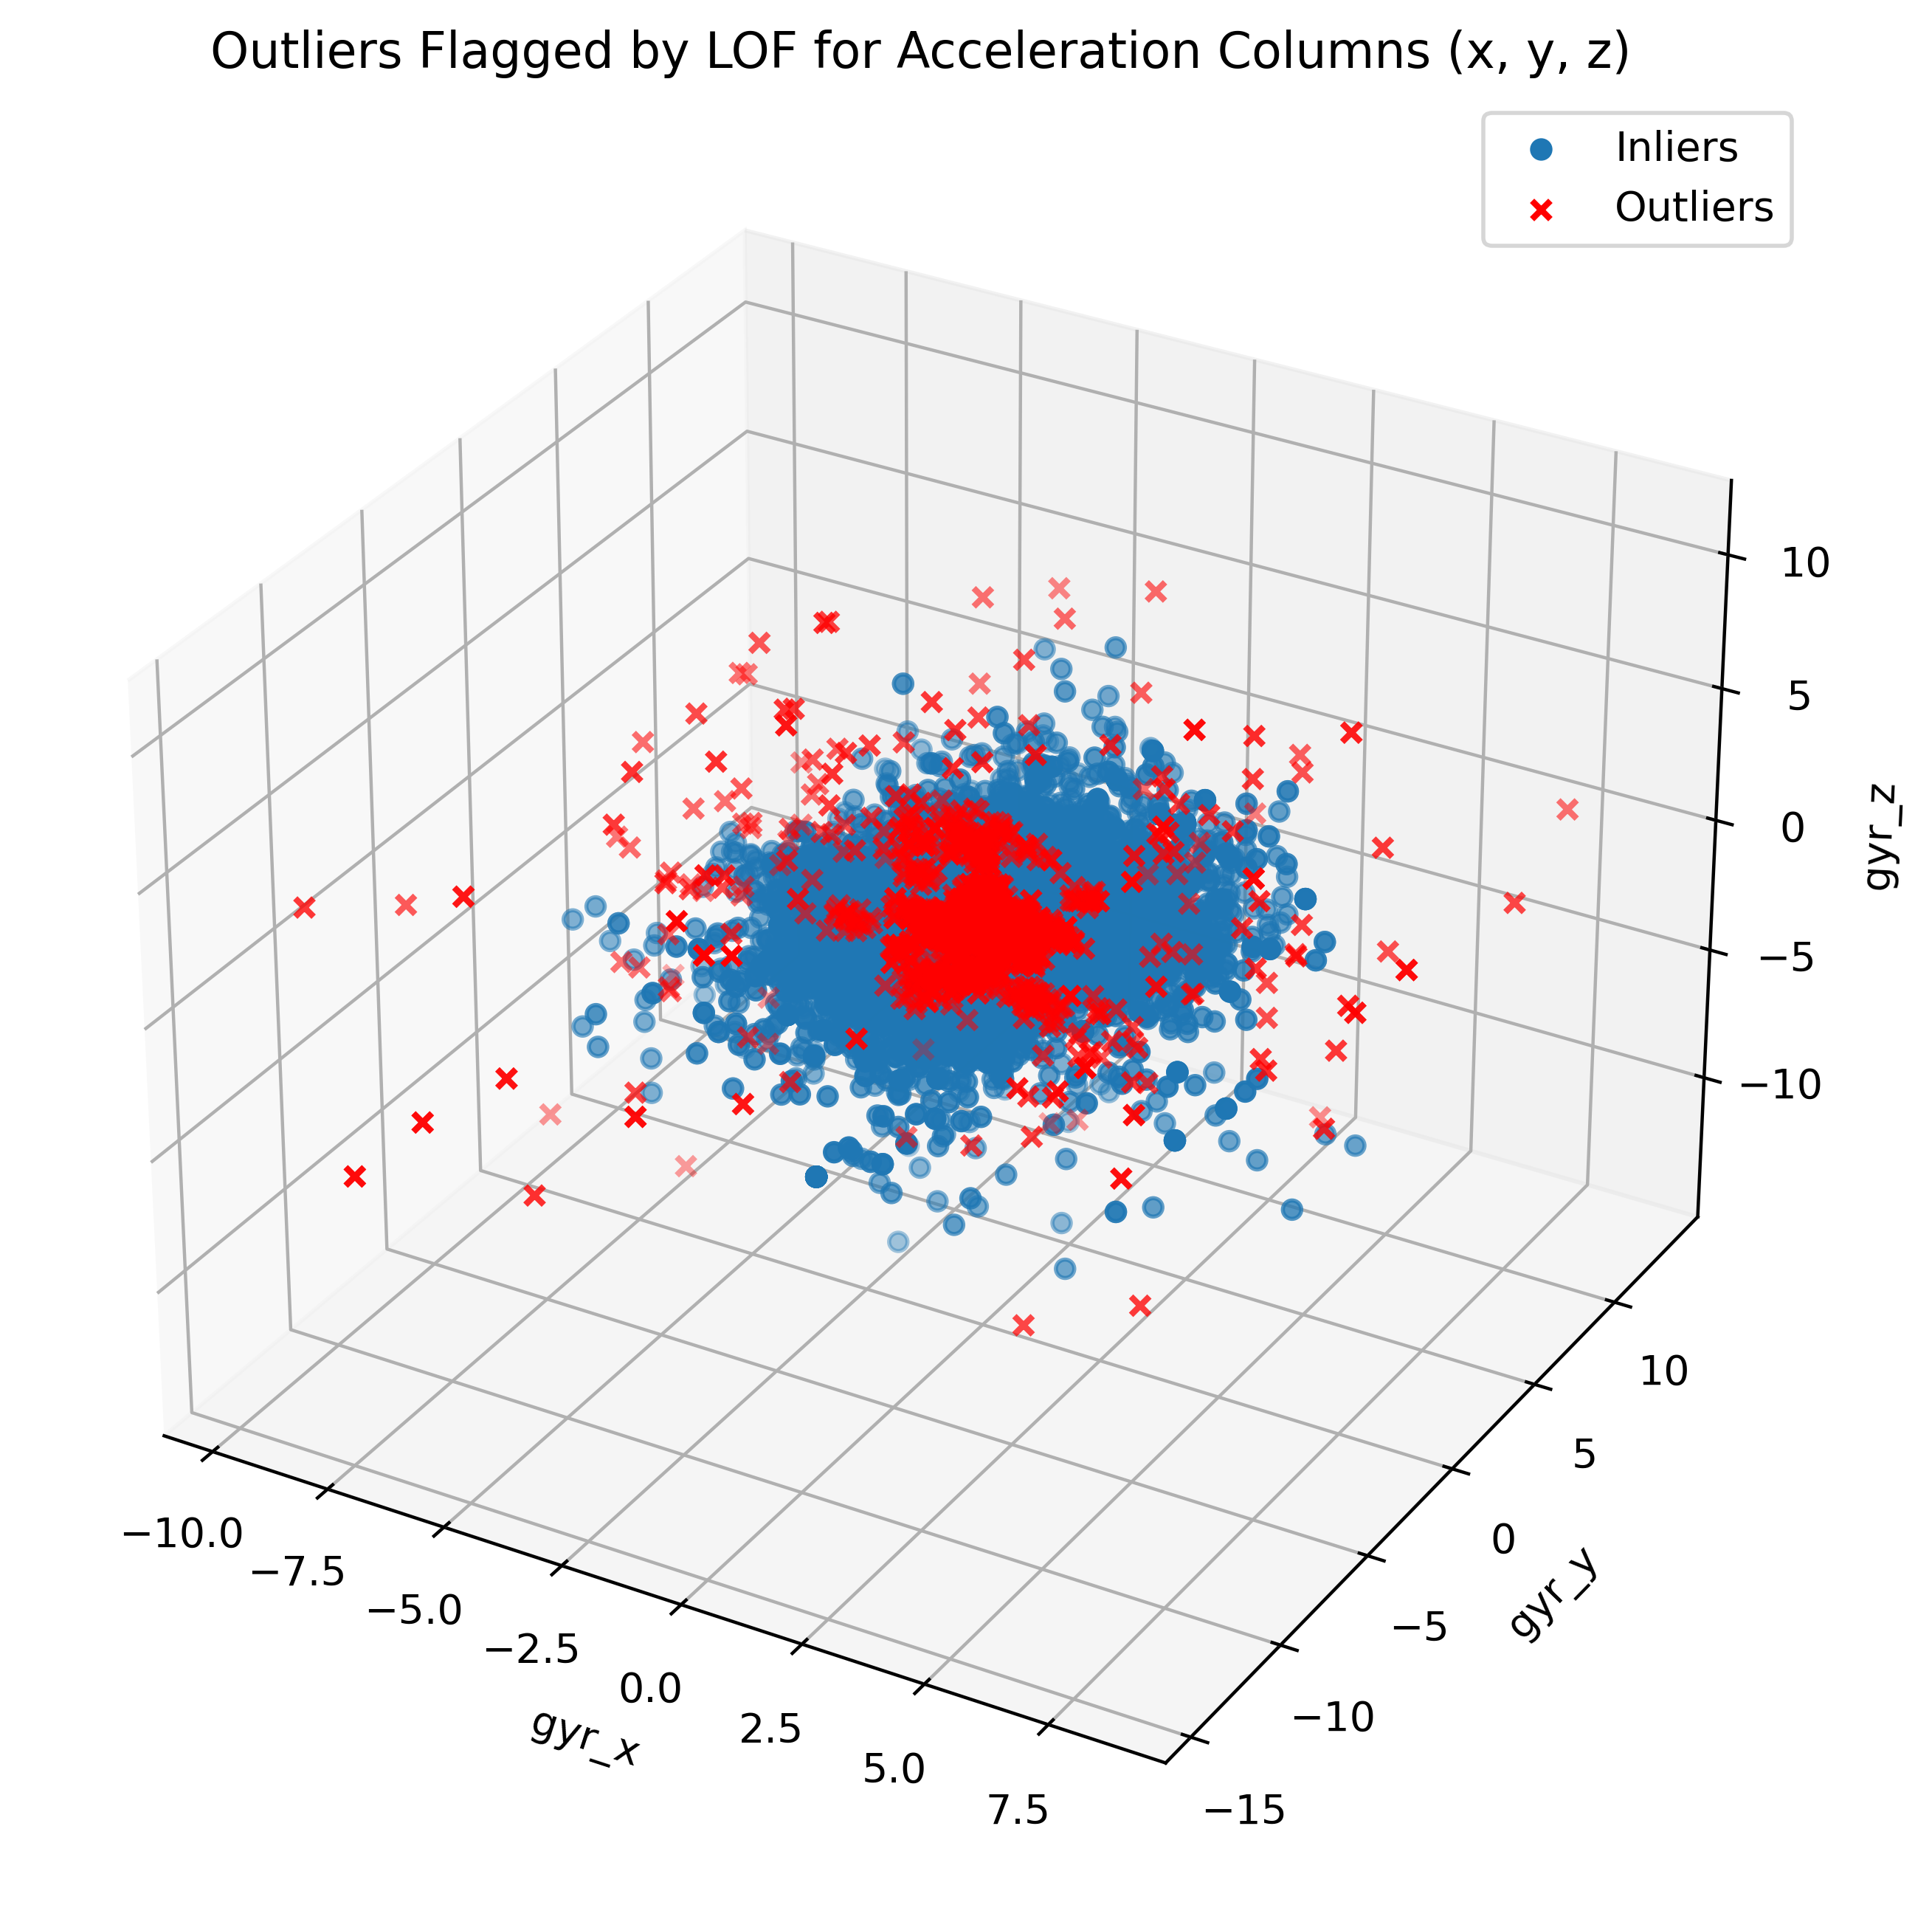

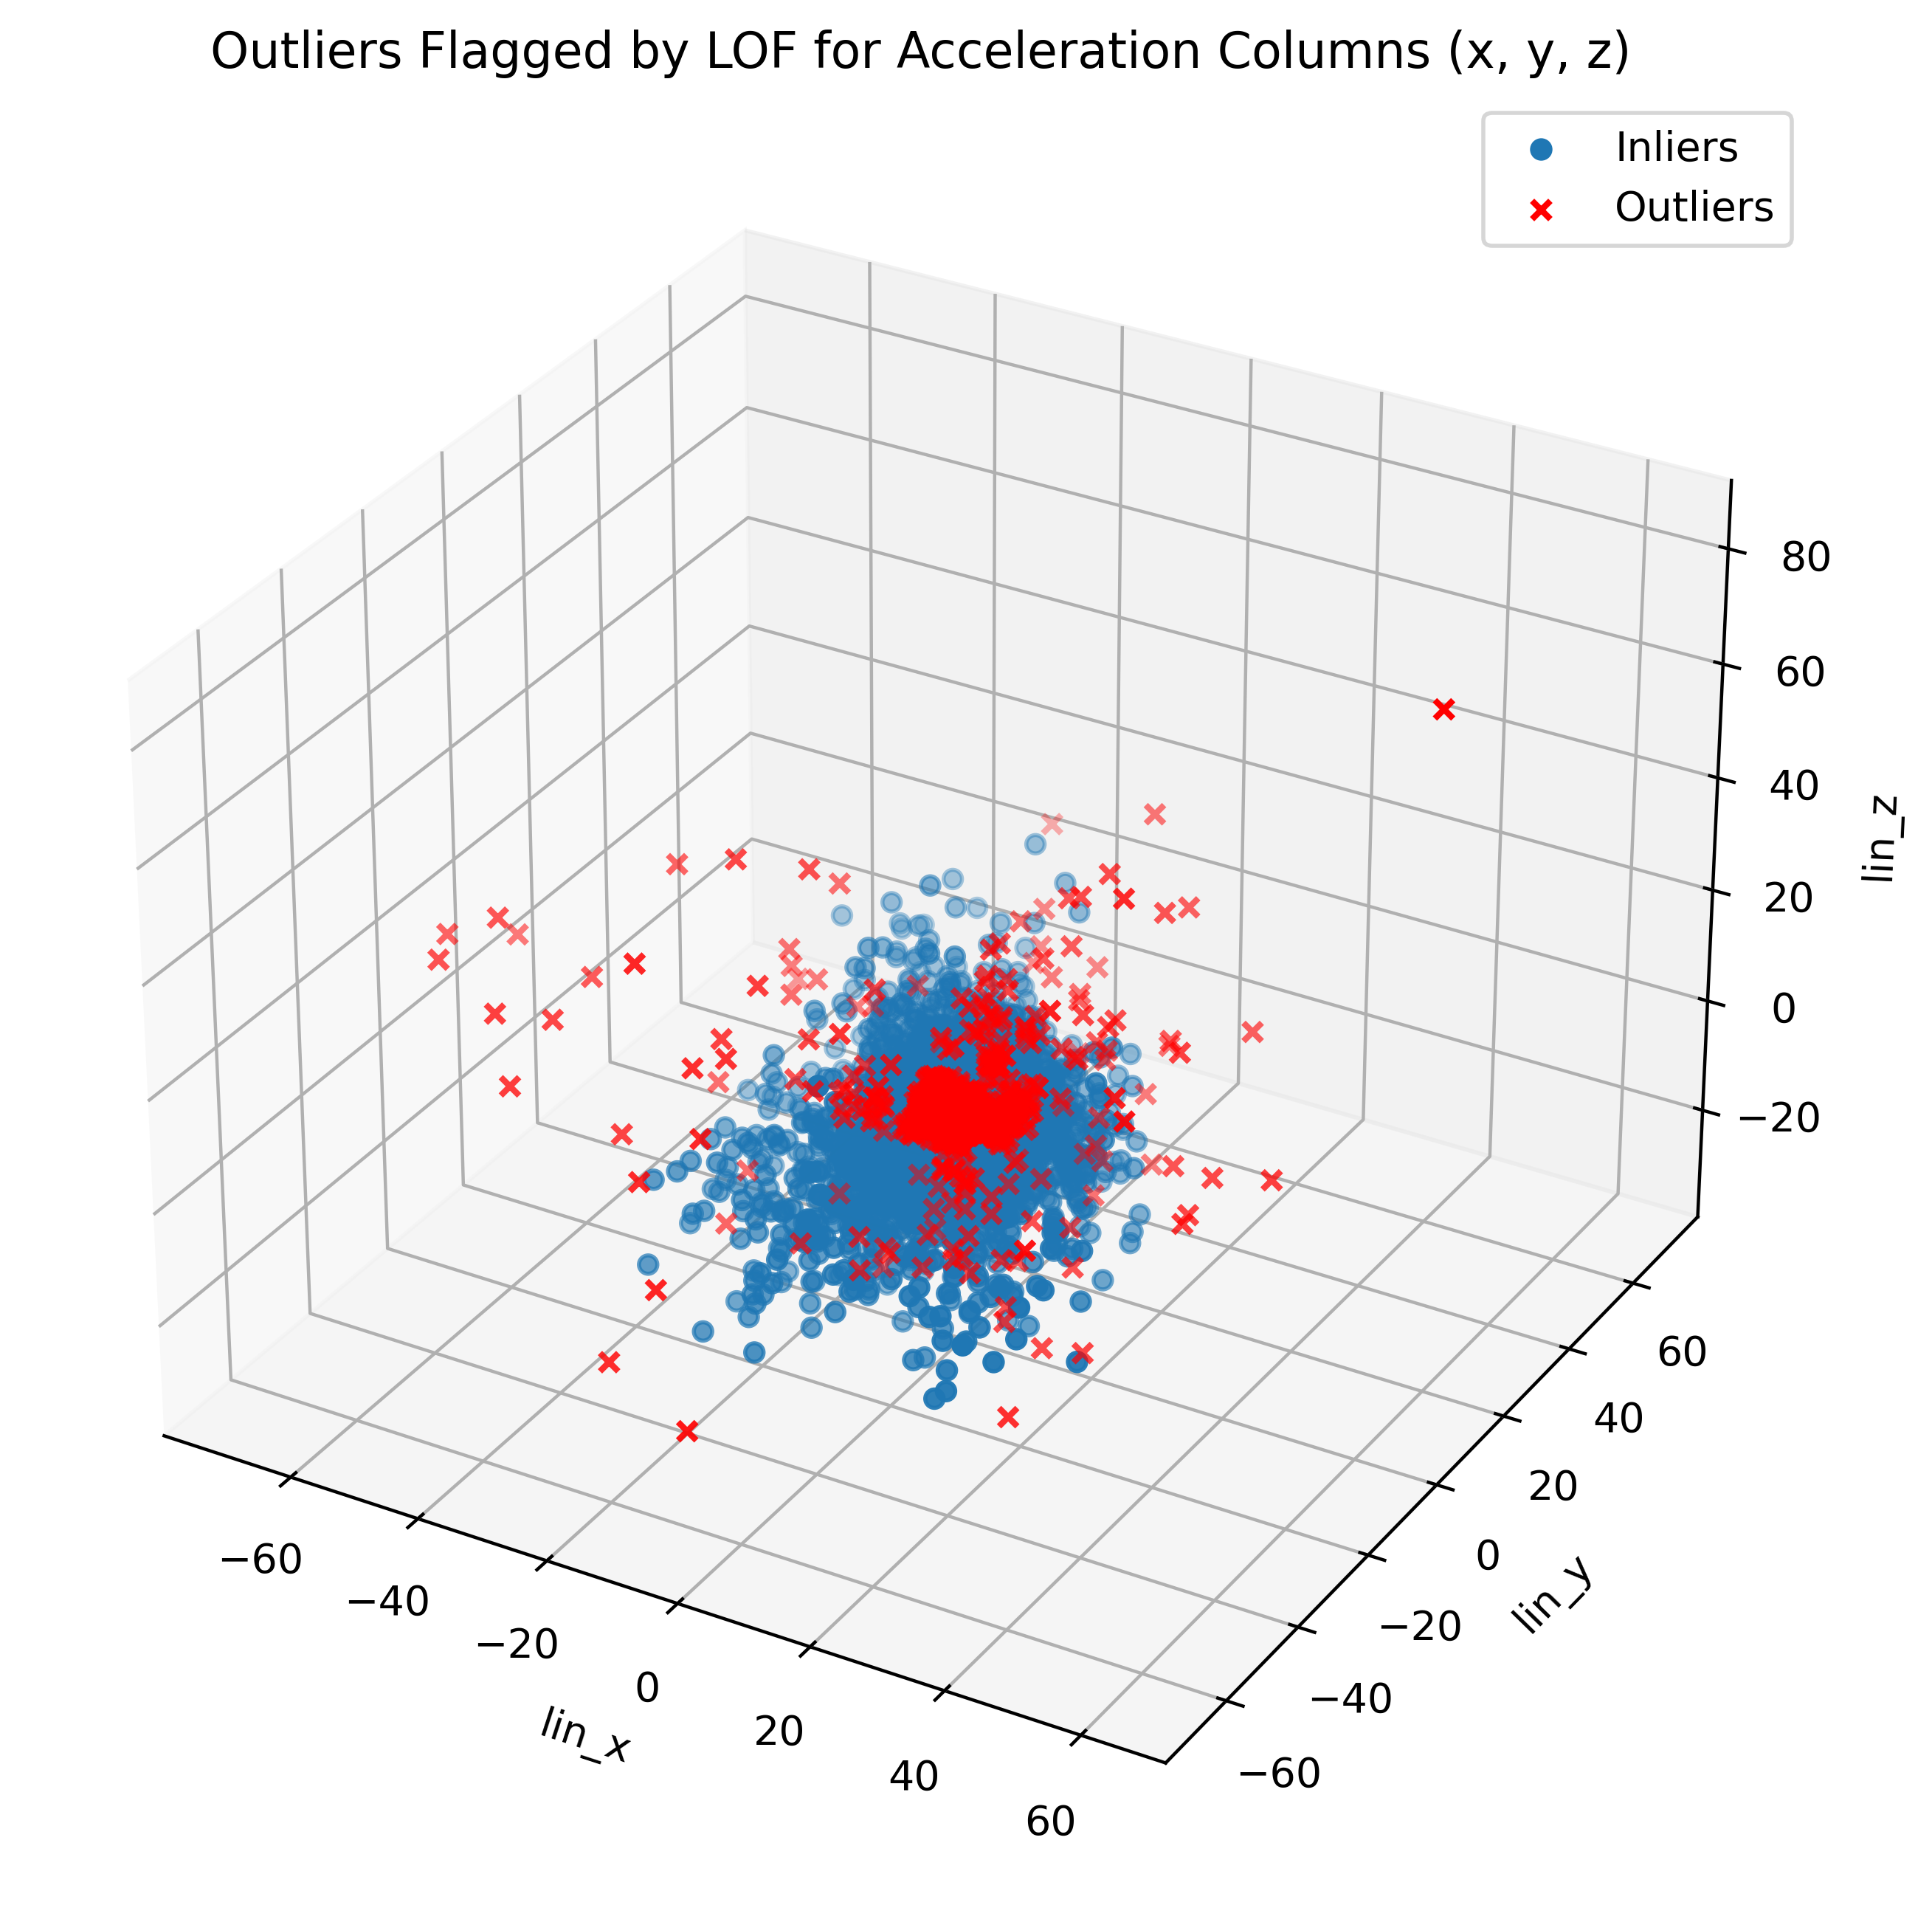

In [82]:
df = pd.read_csv('A3_dataset/COMBINED_ch2_result.csv')
for label in df.activity.unique():
    df["label-" + label] = (df['activity'] == label)
    
for outlier_set in sorted(outlier_sets.keys()):
    x, y, z  = outlier_sets[outlier_set]
    LOF = LocalOutlierFactor(n_neighbors=20)
    df['LOF-' + outlier_set] = LOF.fit_predict(df[[x, y, z]])
    outliers = df.loc[df['LOF-' + outlier_set] == -1]
    inliers = df[df['LOF-' + outlier_set] == 1]
    
    fig = plt.figure(figsize=(8, 8), dpi = 400)
    
    ax = fig.add_subplot(projection='3d')
    ax.scatter(inliers[x], inliers[y], inliers[z])
    ax.scatter(outliers[x], outliers[y], outliers[z], marker='x', c='red')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend(['Inliers', 'Outliers'])
    ax.set_title(f'Outliers Flagged by LOF for Acceleration Columns (x, y, z)')
    plt.show()
    df.loc[df['LOF-' + outlier_set] == -1, [x, y, z]] = np.nan

In [86]:
for col in outlier_columns:
    df[col] = df[col].interpolate()

In [93]:
for col in df.columns:
    if 'LOF' in col or col == 'activity':
        df.drop(col, axis=1, inplace=True)

In [97]:
df.to_csv('A3_dataset/COMBINED_ch3_result.csv')